### Introduction

In this notebook, I explore the dynamics of dating apps through simulation. I aim to understand how various factors such as gender ratio, like rate, and attractiveness distribution affect number of likes and matches for men and women.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction to Experiment 1

In this first experiment, we set up a baseline scenario where the number of men and women is equal, and both genders have the same like rate.

In [2]:
class Person:
    def __init__(self, like_rate, gender):
        self.like_rate = like_rate
        self.gender = gender
        self.given_likes = set()
        self.got_likes = set()
        self.num_likes = 0
        self.num_matches = 0

    def calculate(self):
        self.num_likes = len(self.got_likes)
        self.num_matches = len(self.given_likes.intersection(self.got_likes))

    @staticmethod
    def calculate_average(people):
        avg_likes = np.mean([person.num_likes for person in people])
        avg_matches = np.mean([person.num_matches for person in people])
        md_likes = np.median([person.num_likes for person in people])
        md_matches = np.median([person.num_matches for person in people])
        return avg_likes, avg_matches, md_likes, md_matches

In [3]:
DAILY_SWIPES = 200
NUM_MEN = 1000
NUM_WOMEN = 1000
LIKE_RATE = 0.25
LIKE_RATE_MEN = LIKE_RATE_WOMEN = LIKE_RATE

In [4]:
def simulate():

    men = [Person(LIKE_RATE_MEN, 'M') for _ in range(NUM_MEN)]
    women = [Person(LIKE_RATE_WOMEN,'W') for _ in range(NUM_WOMEN)]

    all_people = men + women
    
    for person in all_people:
        potential_matches = women if person.gender == 'M' else men
        max_swipes = min(DAILY_SWIPES, len(potential_matches))
        liked_people = np.random.choice(potential_matches, int(max_swipes * person.like_rate), replace=False)
        person.given_likes.update(liked_people)
        for liked_person in liked_people:
            liked_person.got_likes.add(person)


    for person in all_people:
        person.calculate()


    avg_likes_men, avg_matches_men, median_likes_men, median_matches_men = Person.calculate_average(men)
    avg_likes_women, avg_matches_women, median_likes_women, median_matches_women = Person.calculate_average(women)


    columns = ['Metric', 'Men', 'Women']
    df = pd.DataFrame([
        ['Average number of likes', avg_likes_men, avg_likes_women],
        ['Median number of likes', median_likes_men, median_likes_women],
        ['Average number of matches', avg_matches_men, avg_matches_women],
        ['Median number of matches', median_matches_men, median_matches_women]
    ], columns=columns)

    display(df)

In [5]:
simulate()

,Metric,Men,Women
0,Average number of likes,50.000,50.000
1,Median number of likes,50.000,50.000
2,Average number of matches,2.605,2.605
3,Median number of matches,2.000,2.000


#### Results for Experiment 1

The simulation shows that, under these ideal conditions, both genders receive an equal number of likes and matches. This serves as our control experiment for comparison with more realistic scenarios.

### Introduction to Experiment 2

In this experiment, we introduce a gender imbalance, simulating a scenario where there are more men than women on the dating app.

In [6]:
DAILY_SWIPES = 200
NUM_MEN = 1400
NUM_WOMEN = 600
LIKE_RATE = 0.25
LIKE_RATE_MEN = LIKE_RATE_WOMEN = LIKE_RATE

simulate()

,Metric,Men,Women
0,Average number of likes,21.428571,116.666667
1,Median number of likes,21.000000,116.000000
2,Average number of matches,1.787143,4.170000
3,Median number of matches,2.000000,4.000000


#### Results for Experiment 2

The results reveal a significant gender imbalance. Men receive fewer likes and matches, while women receive more. This aligns with real-world observations of dating apps.

### Introduction to Experiment 3

Here, we not only maintain the gender imbalance but also introduce different like rates for men and women.

In [7]:
DAILY_SWIPES = 200
NUM_MEN = 1400
NUM_WOMEN = 600
LIKE_RATE_MEN = 0.45
LIKE_RATE_WOMEN = 0.15

simulate()

,Metric,Men,Women
0,Average number of likes,12.857143,210.0
1,Median number of likes,13.000000,210.0
2,Average number of matches,2.014286,4.7
3,Median number of matches,2.000000,5.0


#### Results for Experiment 3

The gender imbalance in likes and matches becomes even more pronounced. Men are less selective, leading to more matches for women.

### Introduction to Experiment 4

In this experiment, we introduce the concept of attractiveness, assuming it follows a uniform distribution.

In [8]:
class Person:
    def __init__(self, like_rate, gender):
        self.like_rate = like_rate
        self.gender = gender
        self.attractiveness = np.random.uniform(0, 1)
        self.given_likes = set()
        self.got_likes = set()
        self.num_likes = 0
        self.num_matches = 0

    def calculate(self):
        self.num_likes = len(self.got_likes)
        self.num_matches = len(self.given_likes.intersection(self.got_likes))

    @staticmethod
    def calculate_average(people):
        avg_likes = np.mean([person.num_likes for person in people])
        avg_matches = np.mean([person.num_matches for person in people])
        md_likes = np.median([person.num_likes for person in people])
        md_matches = np.median([person.num_matches for person in people])
        return avg_likes, avg_matches, md_likes, md_matches

In [9]:
def simulate():
    men = [Person(LIKE_RATE_MEN, 'M') for _ in range(NUM_MEN)]
    women = [Person(LIKE_RATE_WOMEN, 'W') for _ in range(NUM_WOMEN)]

    all_people = men + women

    for person in all_people:
        potential_matches = women if person.gender == 'M' else men
        max_swipes = min(DAILY_SWIPES, len(potential_matches))
        liked_people = [pm for pm in np.random.choice(potential_matches, max_swipes, replace=False) if np.random.uniform(0, 1) < pm.attractiveness]
        person.given_likes.update(liked_people)
        for liked_person in liked_people:
            liked_person.got_likes.add(person)
            
    for person in all_people:
        person.calculate()


    avg_likes_men, avg_matches_men, median_likes_men, median_matches_men = Person.calculate_average(men)
    avg_likes_women, avg_matches_women, median_likes_women, median_matches_women = Person.calculate_average(women)


    columns = ['Metric', 'Men', 'Women']
    df = pd.DataFrame([
        ['Average number of likes', avg_likes_men, avg_likes_women],
        ['Median number of likes', median_likes_men, median_likes_women],
        ['Average number of matches', avg_matches_men, avg_matches_women],
        ['Median number of matches', median_matches_men, median_matches_women]
    ], columns=columns)

    display(df)

In [10]:
DAILY_SWIPES = 200
NUM_MEN = 1400
NUM_WOMEN = 600
# LIKE_RATE_MEN = 0.45
# LIKE_RATE_WOMEN = 0.15

simulate()

,Metric,Men,Women
0,Average number of likes,42.634286,226.143333
1,Median number of likes,43.000000,224.000000
2,Average number of matches,6.926429,16.161667
3,Median number of matches,6.000000,16.000000


#### Results for Experiment 4

Both men and women receive more likes and matches compared to when like rates are fixed. However, the distribution is still uniform, not reflecting real-world scenarios.

### Introduction to Experiment 5

Here, we introduce a skewed distribution for attractiveness, trying to mimic real-world scenarios more closely.

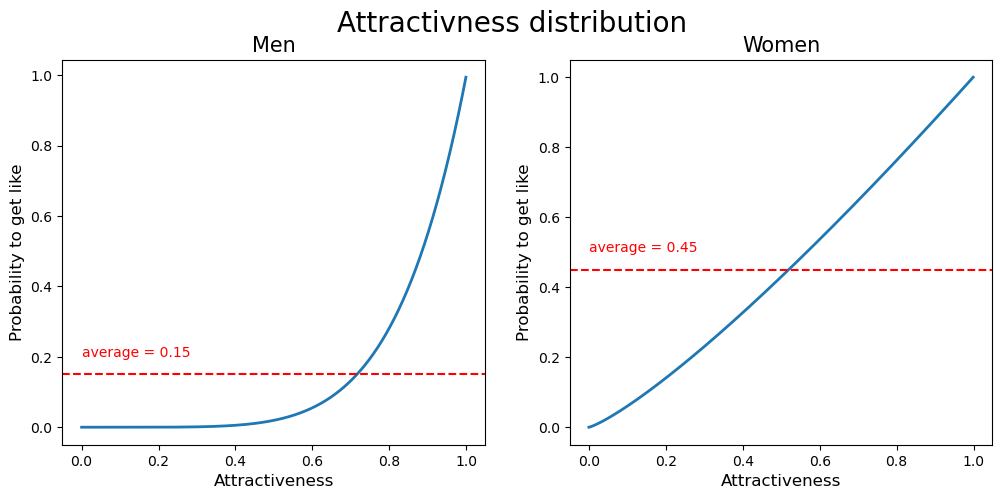

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

x = np.arange(0, 1, 0.001)
ax[0].plot(x, x**5.67, linewidth=2)
ax[0].set_title('Men', fontsize=15)
ax[0].set_xlabel('Attractiveness', fontsize=12)
ax[0].set_ylabel('Probability to get like', fontsize=12)
ax[0].axhline(y = 0.15, color = 'r', linestyle = 'dashed') 
ax[0].text(0, 0.2, 'average = 0.15', color='red')

x = np.arange(0, 1, 0.001)
ax[1].plot(x, x**1.22, linewidth=2)
ax[1].set_title('Women', fontsize=15)
ax[1].set_xlabel('Attractiveness', fontsize=12)
ax[1].set_ylabel('Probability to get like', fontsize=12)
ax[1].axhline(y = 0.45, color = 'r', linestyle = 'dashed')
ax[1].text(0, 0.5, 'average = 0.45', color='red')

plt.suptitle('Attractivness distribution', fontsize=20);
plt.savefig('./distribution_functions.png', dpi=300)

In [12]:
class Person:
    def __init__(self, gender, n):
        self.gender = gender
        self.n = n
        self.attractiveness = np.random.uniform(0, 1)
        self.given_likes = set()
        self.got_likes = set()
        self.num_likes = 0
        self.num_matches = 0
        
    def calculate(self):
        self.num_likes = len(self.got_likes)
        self.num_matches = len(self.given_likes.intersection(self.got_likes))

    @staticmethod
    def calculate_average(people):
        avg_likes = np.mean([person.num_likes for person in people])
        avg_matches = np.mean([person.num_matches for person in people])
        md_likes = np.median([person.num_likes for person in people])
        md_matches = np.median([person.num_matches for person in people])
        return avg_likes, avg_matches, md_likes, md_matches

In [13]:
def simulate():    
    men = [Person('M', N_MEN) for _ in range(NUM_MEN)]
    women = [Person('W', N_WOMEN) for _ in range(NUM_WOMEN)]

    all_people = men + women

    for person in all_people:
        potential_matches = women if person.gender == 'M' else men
        max_swipes = min(DAILY_SWIPES, len(potential_matches))
        liked_people = [pm for pm in np.random.choice(potential_matches, max_swipes, replace=False) if np.random.uniform(0, 1) < pm.attractiveness ** pm.n]
        person.given_likes.update(liked_people)
        for liked_person in liked_people:
            liked_person.got_likes.add(person)
            
    for person in all_people:
        person.calculate()


    avg_likes_men, avg_matches_men, median_likes_men, median_matches_men = Person.calculate_average(men)
    avg_likes_women, avg_matches_women, median_likes_women, median_matches_women = Person.calculate_average(women)


    columns = ['Metric', 'Men', 'Women']
    df = pd.DataFrame([
        ['Average number of likes', avg_likes_men, avg_likes_women],
        ['Median number of likes', median_likes_men, median_likes_women],
        ['Average number of matches', avg_matches_men, avg_matches_women],
        ['Median number of matches', median_matches_men, median_matches_women]
    ], columns=columns)

    display(df)
    
    return men, women

In [14]:
DAILY_SWIPES = 200
NUM_MEN = 1400
NUM_WOMEN = 600
N_MEN = 5.67 
N_WOMEN = 1.22

men, women = simulate()

,Metric,Men,Women
0,Average number of likes,13.088571,203.711667
1,Median number of likes,1.000000,190.000000
2,Average number of matches,1.877857,4.381667
3,Median number of matches,0.000000,4.000000


In [15]:
def collect_stats(people):
    bins = {i: {'likes': [], 'matches': []} for i in range(10)}
    for person in people:
        attractiveness_bin = np.floor(person.attractiveness * 10)
        bins[attractiveness_bin]['likes'].append(person.num_likes)
        bins[attractiveness_bin]['matches'].append(person.num_matches)
    bins_ = {}
    for bin in bins:
        bins_[f'{bin*10}-{bin*10+10}'] = {}
        bins_[f'{bin*10}-{bin*10+10}']['likes'] = np.mean(bins[bin]['likes'])
        bins_[f'{bin*10}-{bin*10+10}']['matches'] = np.mean(bins[bin]['matches'])
    return bins_


In [16]:
stats_men = collect_stats(men)
stats_women = collect_stats(women)

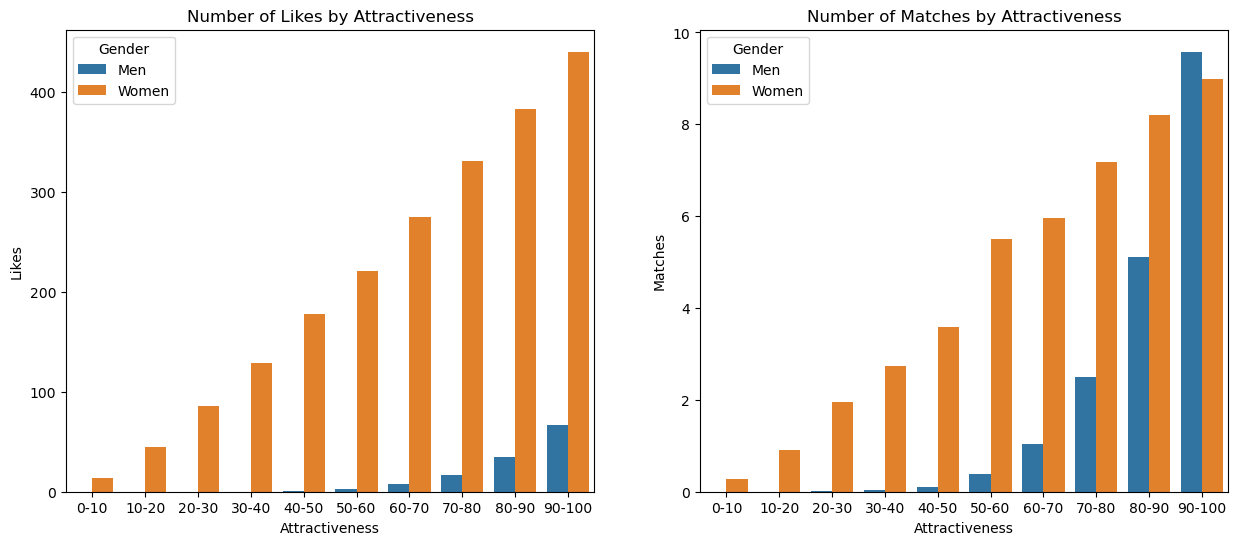

In [17]:
data = []
for attractiveness_bin, stats in stats_men.items():
    data.append({'Attractiveness': attractiveness_bin, 'Gender': 'Men', 'Likes': stats['likes'], 'Matches': stats['matches']})
for attractiveness_bin, stats in stats_women.items():
    data.append({'Attractiveness': attractiveness_bin, 'Gender': 'Women', 'Likes': stats['likes'], 'Matches': stats['matches']})

df = pd.DataFrame(data)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='Attractiveness', y='Likes', hue='Gender', data=df, ax=ax[0])
ax[0].set_title('Number of Likes by Attractiveness')

sns.barplot(x='Attractiveness', y='Matches', hue='Gender', data=df, ax=ax[1])
ax[1].set_title('Number of Matches by Attractiveness')

plt.savefig('./distributions.jpg', dpi=300)
plt.show();

### Results

The results of this experiment reveal several intriguing dynamics:

General Imbalance: As expected, the skewed distribution of attractiveness leads to a significant imbalance in the number of likes and matches received by men and women. Women, on average, receive more likes, but the distribution is highly skewed towards the top percentile of men.

Top Men: Interestingly, the men in the top attractiveness percentiles not only receive a disproportionately high number of likes but also a very high number of matches. In some percentiles, these top men even surpass women in the number of matches.

Why More Matches for Top Men?: One possible explanation for this phenomenon is that these top men are less selective in their swiping behavior compared to women. While they receive fewer likes than the top women, their higher like rate translates to more matches.

Comparison with Women: Even though top women receive more likes, their selectivity in swiping leads to fewer matches compared to top men in some percentiles. This is a surprising outcome and warrants further investigation.

Median Experience: It's important to note that while the top men enjoy a high number of matches, the median experience for men is still less favorable compared to women. Most men receive significantly fewer likes and matches.